In [11]:
from pylab import *
%matplotlib inline

In [12]:
def aleatorio(a=[0, 1]):
    L = a[1] - a[0] + 1
    num = int(L * rand()) + a[0]
    return num


def enfermedad(N=10, L=5):
    bacterias, m = zeros((N, 2)), 0
    bacterias[m] = aleatorio([-L, L]), aleatorio([-L, L])
    while m < N - 1:
        x, y = aleatorio([-L, L]), aleatorio([-L, L])
        agregar = False
        for bac in bacterias:
            if (x, y) == tuple(bac):
                agregar = True
        if agregar == False:
            m += 1
            bacterias[m] = x, y
    return bacterias


def cuerpo(L=5):
    xs = [-L, -L, L, L, -L]
    ys = [L, -L, -L, L, L]
    espacio = L + 3
    xlim([-espacio, espacio]), ylim([-espacio, espacio])
    gca().set_aspect("equal"), grid()
    plot(xs, ys, color="pink", lw="2")


def vacuna(N=15, L=5, prom_vid=[100, 120]):
    # (x,y,edad,v)
    vacs = zeros((N, 4))
    for vac in vacs:
        vac[3] = aleatorio(prom_vid)
    return vacs


def vac_paso(vacs, L=5):
    afuera = L + 2
    for vac in vacs:
        if tuple(abs(vac[0:2])) != (afuera, afuera):
            volado = rand()
            if volado < 0.25:
                vac[0] += 1
            elif 0.25 <= volado < 0.5:
                vac[0] += -1
            elif 0.5 <= volado < 0.75:
                vac[1] += 1
            else:
                vac[1] += -1
            vac[2] += 1
    return vacs


def confinamiento(vacs, L=5):
    rebote = L + 1
    for vac in vacs:
        if vac[0] == rebote:
            vac[0] += -2
        elif vac[0] == -rebote:
            vac[0] += 2
        elif vac[1] == rebote:
            vac[1] += -2
        elif vac[1] == -rebote:
            vac[1] += 2
    return vacs


def ataque(bacs, anti_bacs, L=5):
    for anti in anti_bacs:
        for bac in bacs:
            if tuple(anti[0:2]) == tuple(bac):
                anti[0:2] = -(L + 2), L + 2
                bac[:] = -(L + 2), -(L + 2)
    return bacs, anti_bacs


def vida(anti_bacs, L=5):
    for anti in anti_bacs:
        if anti[2] == anti[3]:
            anti[0:2] = L + 2, L + 2
    return anti_bacs


def bac_muerta(bacterias, L=5):
    num = 0
    for bac in bacterias:
        if tuple(bac) == (-(L + 2), -(L + 2)):
            num += 1
    return num


def tratamiento(Nb=10, Nv=15, L=5, v=[100, 120]):
    bacs, anti_bacs = enfermedad(Nb, L), vacuna(Nv, L, v)
    vida_max = int(max(anti_bacs[:, 3]))
    for i in range(vida_max):
        anti_bacs = vac_paso(anti_bacs, L)
        anti_bacs = confinamiento(anti_bacs, L)
        anti_bacs = vida(anti_bacs, L)
        bacs, anti_bacs = ataque(bacs, anti_bacs, L)
    num_bacs = bac_muerta(bacs, L)
    return bacs, anti_bacs, num_bacs

### Una simulación con los parámetros que están dados por defecto.

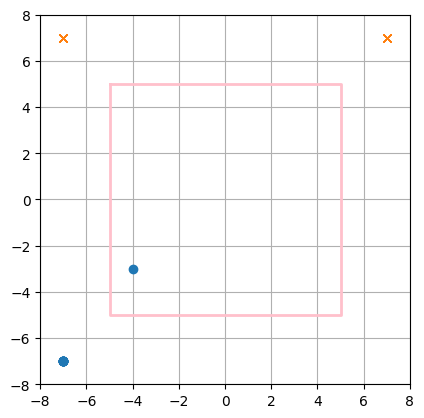

In [13]:
cuerpo()
bacs,anti_bacs,n = tratamiento()
plot(bacs[:,0],bacs[:,1],'o')
plot(anti_bacs[:,0],anti_bacs[:,1],'x')
show()

### Simulación con 100 casos

Número de bacterias = 10

Número de anti-bacterias = 15

Tamaño del cuerpo = 5

Vida media de anti-bacterias = \[150,200\]

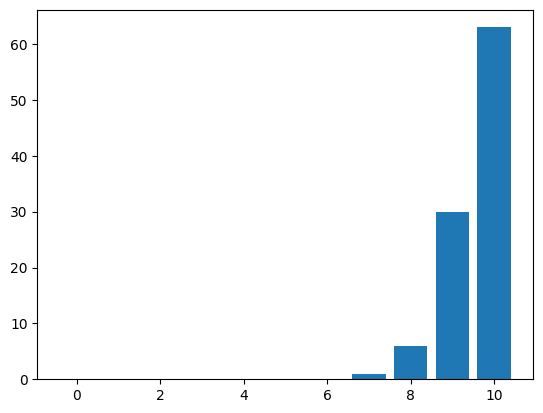

In [14]:
linea_n = range(11)
datos_hist = zeros(11)
for i in range(100):
    bacs,anti_bacs,n = tratamiento(10,15,5,[150,200])
    for j in linea_n:
        if j == n:
            datos_hist[j] +=1
bar(linea_n,datos_hist)
show()

### Simulación con 500 casos

Número de bacterias = 10

Número de anti-bacterias = 15

Tamaño del cuerpo = 5

Vida media de anti-bacterias = \[160,180\]

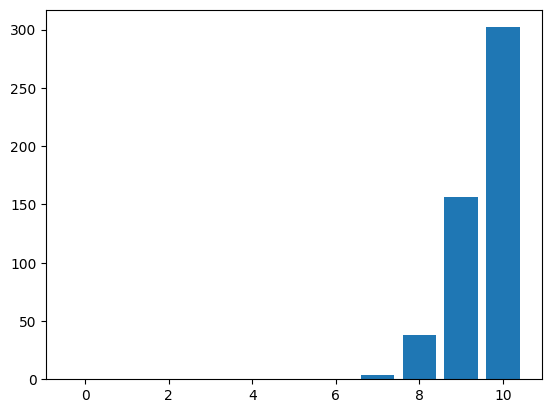

In [15]:
linea_n = range(11)
datos_hist = zeros(11)
for i in range(500):
    bacs,anti_bacs,n = tratamiento(10,15,5,[160,180])
    for j in linea_n:
        if j == n:
            datos_hist[j] +=1
bar(linea_n,datos_hist)
show()